**PARKINSON DISEASE DETECTION USING MACHINE LEARNING**

**DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np

# Load the dataset that needs to be cleaned
data = pd.read_excel('data.xlsx')

In [2]:
#read the data into a pandas dataframe
df = pd.DataFrame(data)
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              318 non-null    object 
 1   MDVP:Fo(Hz)       267 non-null    float64
 2   MDVP:Fhi(Hz)      254 non-null    float64
 3   MDVP:Flo(Hz)      260 non-null    float64
 4   MDVP:Jitter(%)    265 non-null    float64
 5   MDVP:Jitter(Abs)  263 non-null    float64
 6   MDVP:RAP          260 non-null    float64
 7   MDVP:PPQ          254 non-null    float64
 8   Jitter:DDP        265 non-null    float64
 9   MDVP:Shimmer      253 non-null    float64
 10  MDVP:Shimmer(dB)  245 non-null    float64
 11  Shimmer:APQ3      260 non-null    float64
 12  Shimmer:APQ5      253 non-null    float64
 13  MDVP:APQ          263 non-null    float64
 14  Shimmer:DDA       247 non-null    float64
 15  NHR               255 non-null    float64
 16  HNR               261 non-null    float64
 1

In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,267.000000,254.000000,260.000000,265.000000,263.000000,260.000000,254.000000,265.000000,253.00000,245.000000,...,247.000000,255.000000,261.000000,195.000000,253.000000,262.000000,263.000000,262.000000,253.000000,264.000000
mean,153.258281,198.091598,117.715685,0.006301,0.000043,0.003318,0.003454,0.009663,0.02995,0.286616,...,0.046929,0.025565,21.902360,0.753846,0.499810,0.714272,-5.637683,0.226109,2.388680,0.209016
std,42.130422,93.550547,43.250810,0.005035,0.000033,0.002734,0.002720,0.008353,0.01868,0.203714,...,0.031616,0.042072,4.263615,0.431878,0.104250,0.054463,1.092260,0.084042,0.380762,0.090670
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.00954,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.879000,134.337250,86.231000,0.003490,0.000020,0.001680,0.001865,0.004990,0.01660,0.148000,...,0.023185,0.005925,19.493000,1.000000,0.418622,0.668132,-6.443766,0.173369,2.103014,0.135242
50%,148.462000,172.917500,105.691000,0.004960,0.000030,0.002540,0.002725,0.007310,0.02297,0.221000,...,0.038310,0.011800,21.934000,1.000000,0.498877,0.719467,-5.634322,0.212823,2.374073,0.202879
75%,179.954500,227.124500,143.153500,0.007400,0.000055,0.003942,0.003958,0.011120,0.03852,0.350000,...,0.061850,0.025290,24.971000,1.000000,0.589956,0.758038,-4.937060,0.280052,2.638279,0.260375
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.11908,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
#Drop missing value records and reset to proper index
df = df.dropna()
df = df.reset_index(drop=True)
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.000020,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1.0,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
2,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.000040,0.00211,0.00292,0.00632,0.02047,...,0.02908,0.01859,22.333,1.0,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
3,phon_R01_S18_1,140.341,159.774,67.021,0.00817,0.000060,0.00430,0.00440,0.01289,0.03198,...,0.05490,0.02183,19.560,1.0,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156
4,phon_R01_S17_5,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,...,0.02308,0.00300,26.415,0.0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S02_5,88.333,112.240,84.072,0.00505,0.000060,0.00254,0.00330,0.00763,0.02143,...,0.03237,0.01166,21.118,1.0,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
191,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.000040,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
192,phon_R01_S27_4,178.285,442.824,82.063,0.00462,0.000030,0.00157,0.00194,0.00472,0.01279,...,0.01851,0.00856,25.020,1.0,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
193,phon_R01_S13_1,122.188,128.611,115.765,0.00524,0.000040,0.00169,0.00203,0.00507,0.01613,...,0.02566,0.00839,23.162,0.0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867


In [5]:
df = df.sort_values(by=['name'])
df = df.reset_index(drop=True)
df.to_excel("ProcessedPDDdata.xlsx")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


BUILDING THE XGBCLASSIFIER USING THE PROCESSED DATA

In [7]:
#Seperating the features and target varible for model training
features = df.loc[:,df.columns!='status'].values[:,1:]
label = df.loc[:,'status'].values

print("Features:\nType:"+str(type(features))+"\nShape of array:"+str(features.shape)+"\n"+str(features)+"\n")
print("Label:\nType:"+str(type(label))+"\nShape of array:"+str(label.shape)+"\n"+str(label))

Features:
Type:<class 'numpy.ndarray'>
Shape of array:(195, 22)
[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]

Label:
Type:<class 'numpy.ndarray'>
Shape of array:(195,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0

In [8]:
print(label[label==1].shape[0], label[label==0].shape[0])

147 48


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

#Scaling all the feature values to a similar range bound
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = label

x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold

#Splitting the dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

print("Shape of training dataset: " + str(x_train.shape))
print("Shape of testing dataset: " + str(x_test.shape))

#create an evaluation dataset to track progress of training process
eval_set = [(x_train, y_train), (x_test, y_test)]

Shape of training dataset: (156, 22)
Shape of testing dataset: (39, 22)


In [11]:
from xgboost import XGBClassifier, plot_importance

# Defining the classification model [XGBClassifier] with custom parameters
classifier = XGBClassifier(
    eta = 0.3,
    n_estimators = 100,
    max_depth = 2,
    booster = 'gbtree',
    eval_metric = 'error',
    seed = 0
)
classifier.fit(x_train, y_train, eval_set=eval_set)

[0]	validation_0-error:0.26282	validation_1-error:0.17949
[1]	validation_0-error:0.12821	validation_1-error:0.15385
[2]	validation_0-error:0.09615	validation_1-error:0.10256
[3]	validation_0-error:0.09615	validation_1-error:0.07692
[4]	validation_0-error:0.08333	validation_1-error:0.07692
[5]	validation_0-error:0.07692	validation_1-error:0.07692
[6]	validation_0-error:0.05769	validation_1-error:0.07692
[7]	validation_0-error:0.05769	validation_1-error:0.10256
[8]	validation_0-error:0.05128	validation_1-error:0.10256
[9]	validation_0-error:0.04487	validation_1-error:0.07692
[10]	validation_0-error:0.04487	validation_1-error:0.07692
[11]	validation_0-error:0.02564	validation_1-error:0.07692
[12]	validation_0-error:0.02564	validation_1-error:0.05128
[13]	validation_0-error:0.01923	validation_1-error:0.02564
[14]	validation_0-error:0.01923	validation_1-error:0.00000
[15]	validation_0-error:0.01282	validation_1-error:0.05128
[16]	validation_0-error:0.00641	validation_1-error:0.05128
[17]	va

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='error',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

**ANALYSING THE TRAINED MODEL**

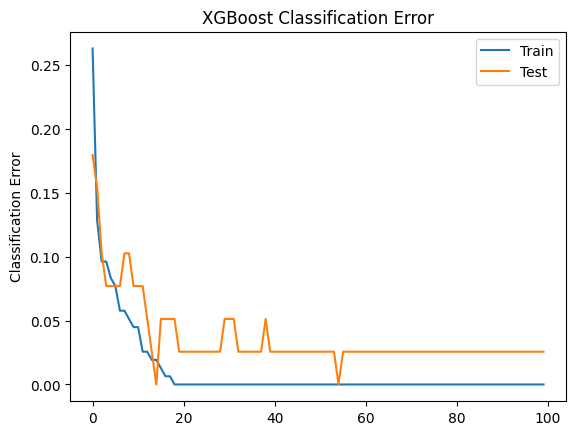

In [12]:
import matplotlib.pyplot as pyplot

# retrieve performance metrics
results = classifier.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

KFOLD VALIDATION WITH 5 FOLDS

In [13]:
# Define the number of folds for cross-validation
n_folds = 5

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(classifier, x, y, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.94871795 0.97435897 0.92307692 0.92307692 0.8974359 ]
Mean CV score: 0.9333333333333333
Standard deviation of CV scores: 0.02614881801842451


Model Weights:
[0.03035535 0.0271101  0.         0.01795094 0.00479157 0.02214606
 0.00707683 0.         0.         0.16131732 0.09098586 0.10951228
 0.01284304 0.         0.02560836 0.00205347 0.01787007 0.02479031
 0.27848446 0.0558318  0.03397872 0.07729352]


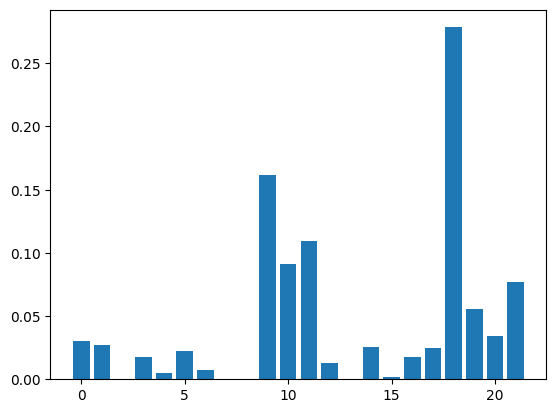

In [14]:
print("Model Weights:\n" + str(classifier.feature_importances_))

# plot the feature importances and/or model weights
pyplot.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
pyplot.show()

**MODEL PERFOMANCE STATISTICS**

In [15]:
# Make predictions using the trained model and y_test data
y_pred = classifier.predict(x_test)

print("Accuracy score of the classifier: "+str(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n" + str(classification_report(y_test, y_pred)))

Accuracy score of the classifier: 97.43589743589743
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



**SAVING THE TRAINED MODEL**

In [16]:
import joblib

# Save the trained model
joblib.dump(classifier, 'ParkinsonsPredictor.sav')
classifier.save_model('xgbclassifier.json')